<a href="https://colab.research.google.com/github/Rashmiyadav3/machine_learning/blob/main/Model_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!pip install kaggle
!kaggle datasets download -d moltean/fruits
!unzip fruits.zip -d fruit36

Streaming output truncated to the last 5000 lines.
  inflating: fruit36/fruits-360_original-size/fruits-360-original-size/Validation/Tomato 1/r0_277.jpg  
  inflating: fruit36/fruits-360_original-size/fruits-360-original-size/Validation/Tomato 1/r0_281.jpg  
  inflating: fruit36/fruits-360_original-size/fruits-360-original-size/Validation/Tomato 1/r0_285.jpg  
  inflating: fruit36/fruits-360_original-size/fruits-360-original-size/Validation/Tomato 1/r0_289.jpg  
  inflating: fruit36/fruits-360_original-size/fruits-360-original-size/Validation/Tomato 1/r0_29.jpg  
  inflating: fruit36/fruits-360_original-size/fruits-360-original-size/Validation/Tomato 1/r0_33.jpg  
  inflating: fruit36/fruits-360_original-size/fruits-360-original-size/Validation/Tomato 1/r0_37.jpg  
  inflating: fruit36/fruits-360_original-size/fruits-360-original-size/Validation/Tomato 1/r0_41.jpg  
  inflating: fruit36/fruits-360_original-size/fruits-360-original-size/Validation/Tomato 1/r0_45.jpg  
  inflating: fruit

In [ ]:
!ls fruit36/fruits-360_original-size/fruits-360-original-size/Training/
!ls fruit36/fruits-360_original-size/fruits-360-original-size/Validation/

'Apple 10'	       'Avocado Black 1'	    'Cucumber 4'
'Apple 11'	       'Avocado Green 1'	    'Cucumber 5'
'Apple 12'	       'Banana 3'		    'Cucumber 7'
'Apple 13'	       'Banana 4'		    'Cucumber 9'
'Apple 14'	       'Beans 1'		     eggplant_long_1
'Apple 17'	       'Blackberrie 1'		    'Gooseberry 1'
'Apple 18'	       'Blackberrie 2'		    'Nut 1'
'Apple 19'	       'Blackberrie half rippen 1'  'Nut 2'
'Apple 5'	       'Blackberrie not rippen 1'   'Nut 3'
 apple_6	       'Cabbage red 1'		    'Nut 4'
'Apple 7'	        cabbage_white_1		    'Nut 5'
'Apple 8'	       'Cactus fruit green 1'	     pear_1
'Apple 9'	       'Cactus fruit red 1'	     pear_3
 apple_braeburn_1      'Caju seed 1'		    'Pistachio 1'
'Apple Core 1'	        carrot_1		    'Quince 2'
 apple_crimson_snow_1  'Cherimoya 1'		    'Quince 3'
 apple_golden_1        'Cherry 3'		    'Quince 4'
 apple_golden_2        'Cherry 4'		    'Tomato 1'
 apple_golden_3        'Cherry 5'		    'Tomato 10'
 apple_granny_smith_1  'Cherry Rainier

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

train_dir = 'fruit36/fruits-360_original-size/fruits-360-original-size/Training/'
IMG_SIZE = (100, 100)
BATCH_SIZE = 32

train_gen = ImageDataGenerator(rescale=1./255)
val_gen=ImageDataGenerator(rescale=1./255)
train_data=train_gen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
    )

Found 29222 images belonging to 90 classes.


In [ ]:
val_dir = 'fruit36/fruits-360_original-size/fruits-360-original-size/Validation/'
val_data = val_gen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 14614 images belonging to 90 classes.


In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(90, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#train the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_data,
    epochs=5,
    validation_data=val_data
)

Epoch 1/5
914/914 ━━━━━━━━━━━━━━━━━━━━ 1005s 1s/step - accuracy: 0.9677 - loss: 0.1009 - val_accuracy: 0.9873 - val_loss: 0.0361
Epoch 2/5
914/914 ━━━━━━━━━━━━━━━━━━━━ 1011s 1s/step - accuracy: 0.9785 - loss: 0.0715 - val_accuracy: 0.9972 - val_loss: 0.0094
Epoch 3/5
914/914 ━━━━━━━━━━━━━━━━━━━━ 975s 1s/step - accuracy: 0.9841 - loss: 0.0510 - val_accuracy: 0.9984 - val_loss: 0.0044
Epoch 4/5
914/914 ━━━━━━━━━━━━━━━━━━━━ 979s 1s/step - accuracy: 0.9905 - loss: 0.0346 - val_accuracy: 0.9843 - val_loss: 0.0553
Epoch 5/5
914/914 ━━━━━━━━━━━━━━━━━━━━ 977s 1s/step - accuracy: 0.9876 - loss: 0.0537 - val_accuracy: 0.9999 - val_loss: 0.0010


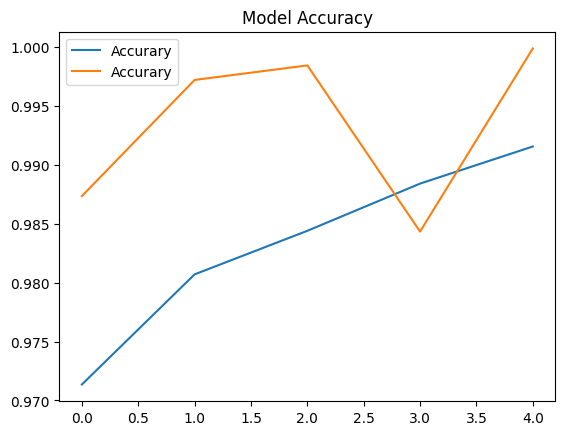

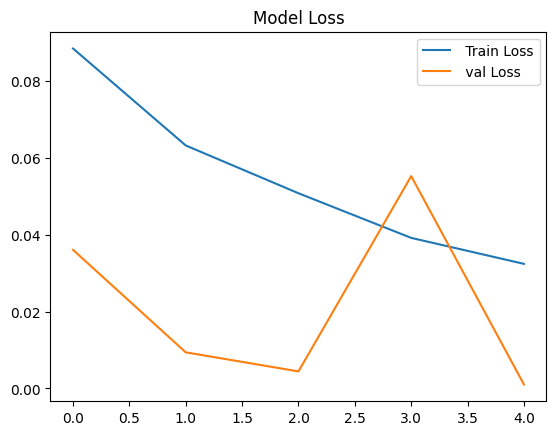

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label = 'Accurary')
plt.plot(history.history['val_accuracy'], label='Accurary')
plt.legend()
plt.title('Model Accuracy')
plt.show()

plt.plot(history.history['loss'], label = ' Train Loss')
plt.plot(history.history['val_loss'], label=' val Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving blackeberry.jpg to blackeberry (2).jpg


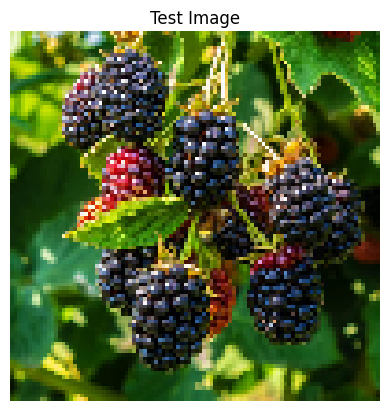

In [ ]:
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
image_path = list(uploaded.keys())[0]
img = load_img(image_path, target_size=IMG_SIZE)
plt.imshow(img)
plt.axis('off')
plt.title("Test Image")
plt.show()

In [ ]:
#preprocess image
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

In [ ]:
#prediction
pred=model.predict(img_array)
pred_class_index = np.argmax(pred)
pred_class_label = list(train_data.class_indices.keys())[pred_class_index]
print("Predicted Class:", pred_class_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Predicted Class: Blackberrie 1
